In [99]:
import pandas as pd

In [104]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\New folder\dataset\final_merged_output.csv")

In [105]:
df.tail()

,EmployeeID,Name,Department,Role,PunchTimeIn,PunchTimeOut,TimeZone,IsLatePunchIn,IsEarlyPunchOut,created_date,...,LeaveReason,LeaveType,LeaveApprovalStatus,Title,StartTime,EndTime,Status,ActiveTime,IdealTime,Duration
113485,10,Walter Garcia,Sales,Account Executive,2025-11-01 05:40:00,2025-11-01 13:58:00,Asia/Kolkata,True,False,23:36.8,...,ye mana kar ke dikha,Unpaid,REJECTED,Inbox - alkeshfinserv1@gmail.com - Gmail - Goo...,2024-07-12 07:24:00,2024-07-12 17:02:00,Neutral,11.0,0,11.0
113486,10,Walter Garcia,Sales,Account Executive,2025-11-01 05:40:00,2025-11-01 13:58:00,Asia/Kolkata,True,False,23:36.8,...,ye mana kar ke dikha,Unpaid,REJECTED,Login File - C A Atul Kumar - alkeshfinserv55@...,2024-12-11 09:32:00,2024-12-11 19:02:00,Unproductive,5.0,0,5.0
113487,10,Walter Garcia,Sales,Account Executive,2025-11-01 05:40:00,2025-11-01 13:58:00,Asia/Kolkata,True,False,23:36.8,...,ye mana kar ke dikha,Unpaid,REJECTED,Sent Mail - alkeshfinserv55@gmail.com - Gmail ...,2024-04-11 07:05:00,2024-04-11 18:13:00,Neutral,1.0,0,1.0
113488,10,Walter Garcia,Sales,Account Executive,2025-11-01 05:40:00,2025-11-01 13:58:00,Asia/Kolkata,True,False,23:36.8,...,ye mana kar ke dikha,Unpaid,REJECTED,Inbox (12) - alkeshfinserv55@gmail.com - Gmail...,2024-11-27 08:15:00,2024-11-27 18:19:00,Unproductive,5.0,0,5.0
113489,10,Walter Garcia,Sales,Account Executive,2025-11-01 05:40:00,2025-11-01 13:58:00,Asia/Kolkata,True,False,23:36.8,...,ye mana kar ke dikha,Unpaid,REJECTED,Gmail - Google Chrome,2024-12-24 09:24:00,2024-12-24 17:38:00,Neutral,5.0,0,5.0


In [106]:
df.shape

(113490, 23)

In [107]:
df.columns

Index(['EmployeeID', 'Name', 'Department', 'Role', 'PunchTimeIn',
       'PunchTimeOut', 'TimeZone', 'IsLatePunchIn', 'IsEarlyPunchOut',
       'created_date', 'LeaveStartDate', 'LeaveEndDate', 'approval_time',
       'LeaveReason', 'LeaveType', 'LeaveApprovalStatus', 'Title', 'StartTime',
       'EndTime', 'Status', 'ActiveTime', 'IdealTime', 'Duration'],
      dtype='object')

In [108]:
filtered_var=df[df["Department"]=="Sales"]
filtered_var["PunchTimeIn"].tail()

113485    2025-11-01 05:40:00
113486    2025-11-01 05:40:00
113487    2025-11-01 05:40:00
113488    2025-11-01 05:40:00
113489    2025-11-01 05:40:00
Name: PunchTimeIn, dtype: object

In [109]:
df.isnull().sum()

EmployeeID             0
Name                   0
Department             0
Role                   0
PunchTimeIn            0
PunchTimeOut           0
TimeZone               0
IsLatePunchIn          0
IsEarlyPunchOut        0
created_date           0
LeaveStartDate         0
LeaveEndDate           0
approval_time          0
LeaveReason            0
LeaveType              0
LeaveApprovalStatus    0
Title                  0
StartTime              0
EndTime                0
Status                 0
ActiveTime             0
IdealTime              0
Duration               0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_7872\3704616013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_var['StartTime'] = pd.to_datetime(filtered_var['StartTime'])


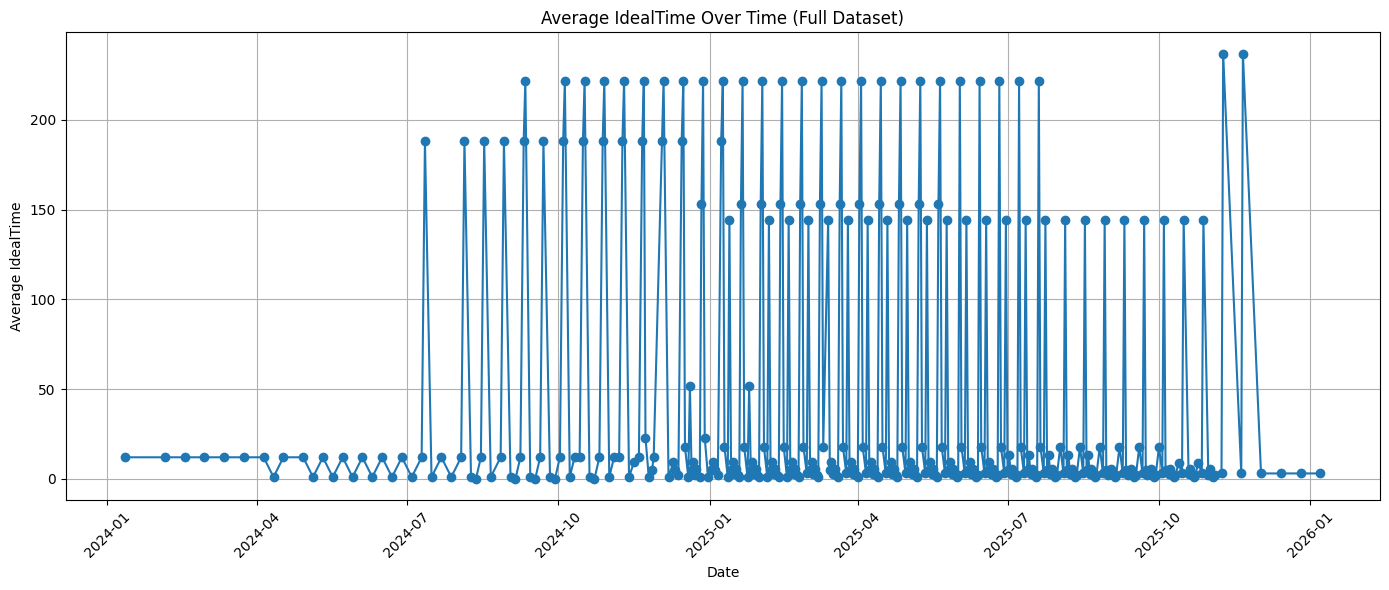

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'PunchTimeIn' is in datetime format
filtered_var['StartTime'] = pd.to_datetime(filtered_var['StartTime'])

# Set 'PunchTimeIn' as the index
filtered_var.set_index('StartTime', inplace=True)

# Group by date and calculate average IdealTime per day
duration_per_day = filtered_var.groupby(filtered_var.index.date)['Duration'].mean()

# Plot the time series
duration_per_day.plot(figsize=(14, 6), title='Average IdealTime Over Time (Full Dataset)', marker='o')
plt.xlabel("Date")
plt.ylabel("Average IdealTime")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Check for stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] > 0.05:
        print("Data is non-stationary. Applying differencing.")
        return series.diff().dropna()
    else:
        print("Data is stationary.")
        return series

# Apply ADF test and perform differencing if necessary
df['IdealTime'] = adf_test(df['IdealTime'])